In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

def I(P,W,r):
    
    I = P * np.exp(-2 * r**2 / W**2)
    
    return I

def C(P1,P2,W1,W2,R):
    
    r = sym.Symbol('r')
    
    C = 1/(P1 * P2 *  sym.integrate(sym.exp(-2 * r**2 / W1**2) * sym.exp(-2 * r**2 / W2**2), (r,0,R)))
           
    return C

def eta_crystal(C,P1,P2,W1,W2,R):
    
    r = sym.Symbol('r')
    
    eta_crystal = C * P1 * P2 * sym.integrate(sym.exp(-2 * r**2 / W1**2) * sym.exp(-2 * r**2 / W2**2), (r,0,R))
    
    return eta_crystal

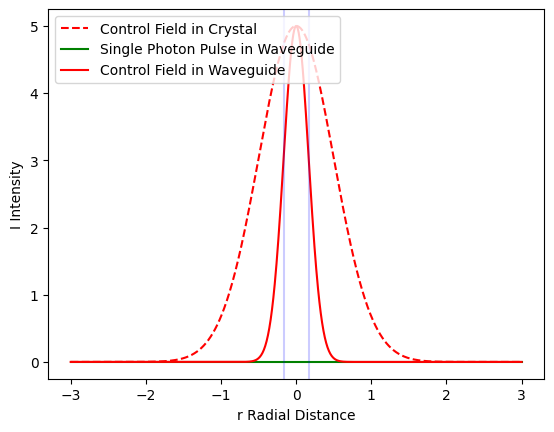

In [3]:
P1 = 5
W1 = 1
W2 = W1/3
P2 = P1/1e9
r = np.linspace(-3,3,1000)

plt.figure()
plt.plot(r,I(P1,W1,r),'r--', label='Control Field in Crystal')
plt.plot(r,I(P2,W2,r),'g', label='Single Photon Pulse in Waveguide')
plt.plot(r,I(P1,W2,r),'r', label='Control Field in Waveguide')

plt.axvline(x=W2/2, c='b', alpha=0.2)
plt.axvline(x=-W2/2, c='b', alpha=0.2)

plt.xlabel('r Radial Distance')
plt.ylabel('I Intensity')
plt.legend(loc='upper left')

In [4]:
C = C(P1,P2,W1,W2,W1/2)

print("Amplitude Constant = ",C)

print("Crystal pulse efficiency = ", eta_crystal(C, P1, P2, W1, W2, W1/2))

print("Waveguide pulse efficiency = ", eta_crystal(C, P1, P2, W2, W2, W2/2))

Amplitude Constant =  358331809.824179/sqrt(pi)
Crystal pulse efficiency =  1.00000000000000
Waveguide pulse efficiency =  0.629096875579046
